In [1]:
import numpy as np
import pandas as pd
import random
from datetime import date, timedelta
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
def assign_titles_and_labels(num_tables=100):
    # Define 100 unique neutral titles
    titles = [
        "Data Summary", "Trend Overview", "Analysis Results", "Experiment Log", "Daily Report",
        "Session Data", "Group Comparison", "Trial Metrics", "Observation Set", "Sample Log",
        "Time Series", "Aggregate Data", "Performance Metrics", "Study Results", "Snapshot Report",
        "Batch Overview", "Log Summary", "Monitoring Record", "Event Timeline", "Record Set",
        "Pattern Trace", "Interval Report", "Snapshot Trends", "Tracking Log", "Result Sheet",
        "Process Overview", "Behavior Report", "Analysis Batch", "Metric Timeline", "Sensor Log",
        "System Summary", "Parameter Report", "Data Dump", "Output Snapshot", "Readout Record",
        "Simulation Log", "Runtime Metrics", "Task Results", "Tracking Table", "Result Summary",
        "Profile Log", "Data Trace", "Timing Results", "System Output", "Evaluation Table",
        "Iteration Record", "Observation Journal", "Value Trace", "Checkpoints", "Trial Report",
        "Input Log", "Result Chart", "Benchmark Log", "Logged Measures", "Computation Log",
        "Outcome Record", "Study Journal", "Schedule Output", "Frequency Table", "Summary Log",
        "Generated Data", "Pattern Snapshot", "Experiment Sheet", "Daily Metrics", "Cycle Summary",
        "Instance Data", "Routine Report", "Session Report", "Input Sequence", "Response Table",
        "Testing Output", "Model Results", "Record Timeline", "Data Matrix", "Interval Snapshot",
        "Logfile Dump", "Snapshot Sheet", "Time Readings", "Scalar Measures", "Grouped Outcomes",
        "Observation Series", "Test Chart", "Logged Values", "Run Summary", "Status Log",
        "Event Summary", "Pattern Grid", "Activity Sheet", "Run Log", "System Check",
        "Evaluation Summary", "Info Table", "Control Report", "Trend Snapshot", "Readout Sheet",
        "Schedule Results", "Time Metrics", "Replay Record", "Feature Dump", "Runtime Log",
        "State Trace", "Measurement Table", "Progress Report", "Data Digest"
    ]

    # Matching label pairs
    label_pairs = [
        ("Time", "Value"), ("Step", "Score"), ("Index", "Response"), ("Cycle", "Measurement"),
        ("Sample", "Observation"), ("Date", "Total"), ("Day", "Count"), ("Session", "Output"),
        ("Trial", "Result"), ("Input", "Reading"), ("Position", "Level"), ("Frame", "Data"),
        ("Tick", "Rate"), ("Phase", "Signal"), ("Round", "Metric"), ("Iteration", "Performance"),
        ("Timestamp", "Reading"), ("Sequence", "Value"), ("Checkpoint", "Accuracy"), ("Stage", "Measure"),
        ("Order", "Indicator"), ("Interval", "Output"), ("Record", "Score"), ("Epoch", "Result"),
        ("Marker", "Signal"), ("Unit", "Value"), ("Window", "Observation"), ("Segment", "Intensity"),
        ("Label", "Magnitude"), ("Frame", "Score"), ("Level", "Detection"), ("Timepoint", "Response"),
        ("Instance", "Frequency"), ("Bin", "Reading"), ("Category", "Amount"), ("Timestamp", "Level"),
        ("Time Step", "Score"), ("Day", "Metric"), ("Hour", "Value"), ("Week", "Volume"),
        ("Month", "Change"), ("Position", "Output"), ("Measurement", "Value"), ("Reading", "Result"),
        ("Pulse", "Response"), ("Trial", "Observation"), ("Run", "Result"), ("Phase", "Volume"),
        ("Cycle", "Average"), ("Stage", "Ratio"), ("Point", "Statistic"), ("Slot", "Output"),
        ("Period", "Signal"), ("Sample", "Detection"), ("Turn", "Value"), ("Frame", "Percent"),
        ("Record", "Count"), ("Round", "Magnitude"), ("Clip", "Measurement"), ("Pass", "Rating"),
        ("Marker", "Proportion"), ("Tag", "Index"), ("Node", "Level"), ("Item", "Frequency"),
        ("Row", "Value"), ("Column", "Reading"), ("Shot", "Return"), ("Phase", "Event"),
        ("Entry", "Intensity"), ("Log", "Estimate"), ("Block", "Signal"), ("Observation", "Score"),
        ("Trial #", "Successes"), ("Run #", "Accuracy"), ("Time", "Reading"), ("Time", "Measurement"),
        ("Time", "Observation"), ("Time", "Output"), ("Time", "Metric"), ("ID", "Response"),
        ("Code", "Performance"), ("Ref", "Count"), ("Value ID", "Output"), ("Order", "Level"),
        ("Timestamp", "Observation"), ("Duration", "Amount"), ("Event", "Occurrence"), ("Phase", "Change"),
        ("Session", "Deviation"), ("Measure", "Level"), ("Index", "Deviation"), ("Step", "Magnitude"),
        ("Progress", "Amount"), ("Pass", "Signal"), ("Attempt", "Result"), ("Sequence", "Detection"),
        ("Marker", "Pattern"), ("Row", "Trend"), ("Log Entry", "Reading"), ("Reading", "Variance"),
        ("Scan", "Intensity"), ("Stage", "Performance"), ("Pulse", "Rate"), ("Frame", "Distance")
    ]

    assert num_tables <= 100, "Only 100 unique titles/labels available"

    return [
        {"title": titles[i], "x_label": label_pairs[i][0], "y_label": label_pairs[i][1]}
        for i in range(num_tables)
    ]


In [3]:
def jitter_group_labels_consistent(groups):
    variations = [
        lambda g: g,                           
        lambda g: g.replace("Group", "Grp"),   
        lambda g: g.replace("Group ", "G"),  
    ]
    # Make consistent variation choices per group
    variation_fn = random.choice(variations)
    return [variation_fn(g) for g in groups]


def generate_dates():
    test_date1, test_date2 = date(1950, 1, 1), date(2025, 1, 1)
    res_dates = [test_date1]
    while test_date1 != test_date2:
        test_date1 += timedelta(days=1)
        res_dates.append(test_date1)

    # random K dates from pack
    start = random.choices(res_dates, k=1)[0]
    return [start + pd.to_timedelta(i * 30, unit='D') for i in range(10)]

In [ ]:
np.random.seed(0)
random.seed(0)

# Define trend types
trend_lines = ['linear', 'logarithmic', 'exponential']
trends = ['increasing', 'decreasing']
x_axis_types = ['number', 'date', 'string']

# Assign unbiased metadata
metadata = assign_titles_and_labels(100)

# Generate dataset
tables = []
for table_id in range(100):
    trend_line = random.choice(trend_lines)
    trend = random.choice(trends)
    x_type = random.choice(x_axis_types)

    # Use shared x_for_y for both x and y
    if trend_line == 'linear':
        x_for_y = np.linspace(0, 1, 10)
    else:
        x_for_y = np.linspace(1, 10, 10)

    scale = random.uniform(5, 15)
    offset = random.uniform(0, 20)  

    # Compute y based on function
    if trend_line == 'linear':
        slope = random.uniform(5, 20)
        y_vals = slope * x_for_y 
    elif trend_line == 'logarithmic':
        base = random.uniform(5, 15)
        y_vals = np.log(x_for_y + 1e-3) * base
    elif trend_line == 'exponential':
        base = random.uniform(1.05, 1.5)
        y_vals = base ** (x_for_y / max(x_for_y) * 10)

    # Assign to x_vals based on x_type
    if x_type == 'number':
        x_vals = np.round(x_for_y * random.uniform(10, 1000), 2)
        decimals = random.randint(0, 2)
        x_vals = np.round(x_vals, decimals)
        x_vals = [f"{int(x)}" if x == int(x) else f"{x:.{decimals}f}" for x in x_vals]
    elif x_type == 'date':
        x_vals = generate_dates()
        # if trend == 'decreasing':
        #     x_vals = x_vals[::-1]
    elif x_type == 'string':
        shuffled_letters = random.sample(list(string.ascii_uppercase), 10)
        base_groups = [f"Group {i}" for i in shuffled_letters]
        x_vals = jitter_group_labels_consistent(base_groups)

    # Apply decreasing if needed
    if trend == 'decreasing':
        y_vals = y_vals[::-1]

    y_vals = y_vals * scale + offset
    decimals = random.randint(0, 2)
    y_vals = np.round(y_vals, decimals)

    y_vals = [f"{int(y)}" if y == int(y) else f"{y:.{decimals}f}" for y in y_vals]

    meta = metadata[table_id]
    df = pd.DataFrame({
        'table_id': table_id,
        'x': x_vals,
        'y': y_vals,
        'trend_line': trend_line,
        'trend': trend,
        'x_type': x_type,
        'title': meta['title'],
        'x_label': meta['x_label'],
        'y_label': meta['y_label'],
    })
    tables.append(df)

dataset = pd.concat(tables, ignore_index=True)
dataset.to_csv("debiased_dataset.csv", index=False)

In [3]:
dataset = pd.read_csv("debiased_dataset.csv", parse_dates=["x"], dayfirst=True, infer_datetime_format=True)
metadata_counts = dataset.drop_duplicates(subset='table_id')

trend_line_counts = {}
trend_counts = {}
x_type_counts = {}
for index, row in metadata_counts.iterrows():
    if row['trend_line'] not in trend_line_counts:
        trend_line_counts[row['trend_line']] = 1
    else:
        trend_line_counts[row['trend_line']] += 1

    if row['trend'] not in trend_counts:
        trend_counts[row['trend']] = 1
    else:
        trend_counts[row['trend']] += 1

    if row['x_type'] not in x_type_counts:
        x_type_counts[row['x_type']] = 1
    else:
        x_type_counts[row['x_type']] += 1
print (trend_line_counts)
print (trend_counts)
print (x_type_counts)

{'logarithmic': 38, 'linear': 27, 'exponential': 35}
{'decreasing': 45, 'increasing': 55}
{'number': 37, 'string': 34, 'date': 29}


/var/folders/0_/jn2j6lc10q30z523m2phyv640000gn/T/ipykernel_17900/734980577.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv("debiased_dataset.csv", parse_dates=["x"], dayfirst=True, infer_datetime_format=True)
/var/folders/0_/jn2j6lc10q30z523m2phyv640000gn/T/ipykernel_17900/734980577.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset = pd.read_csv("debiased_dataset.csv", parse_dates=["x"], dayfirst=True, infer_datetime_format=True)


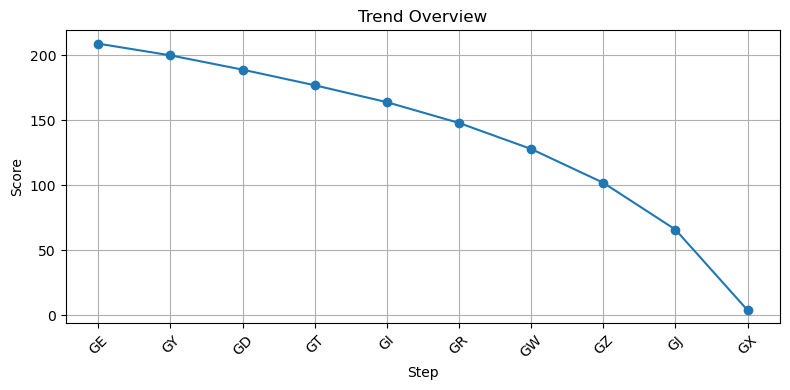

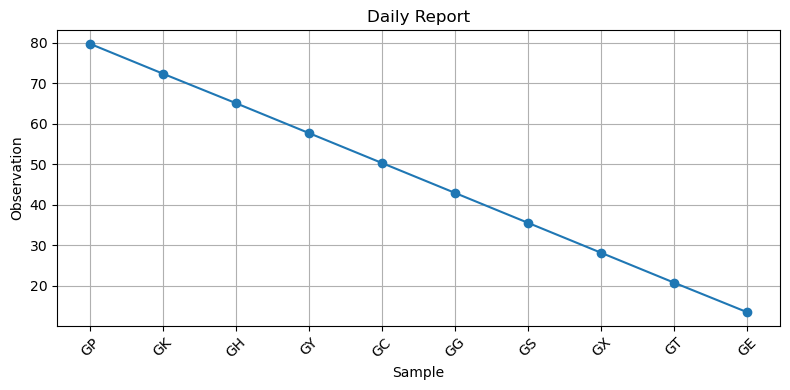

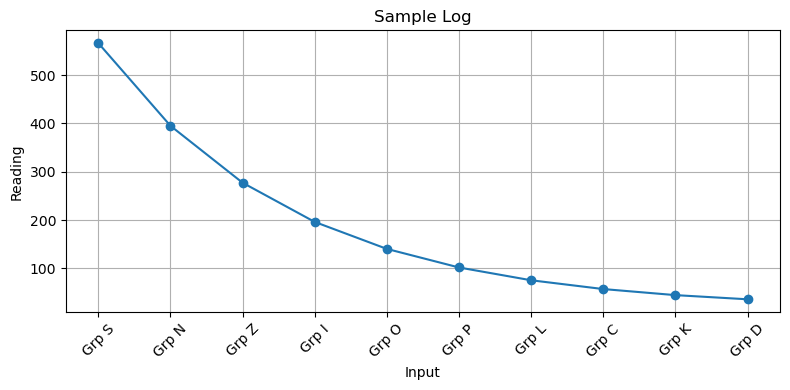

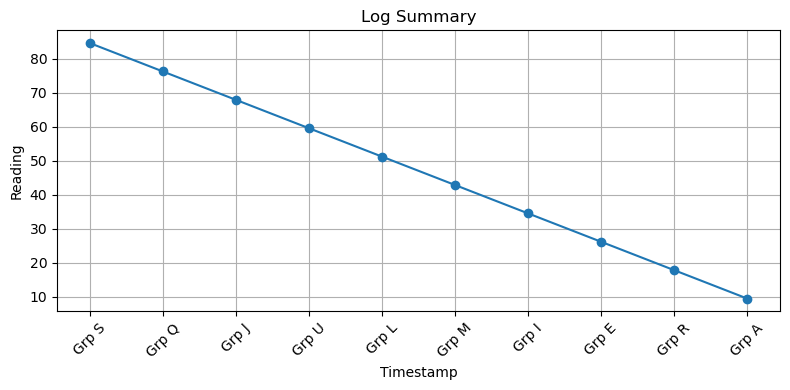

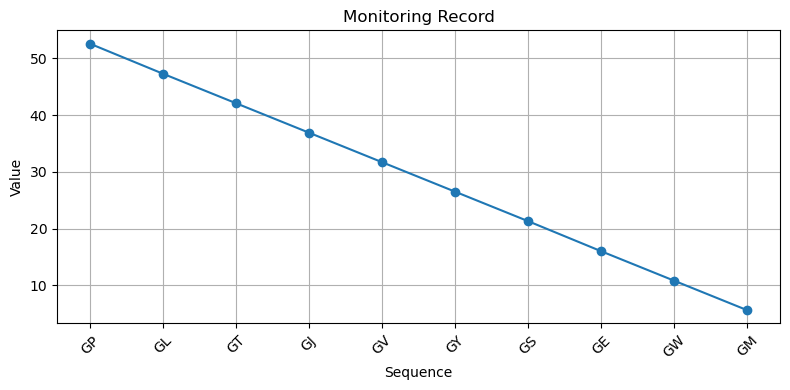

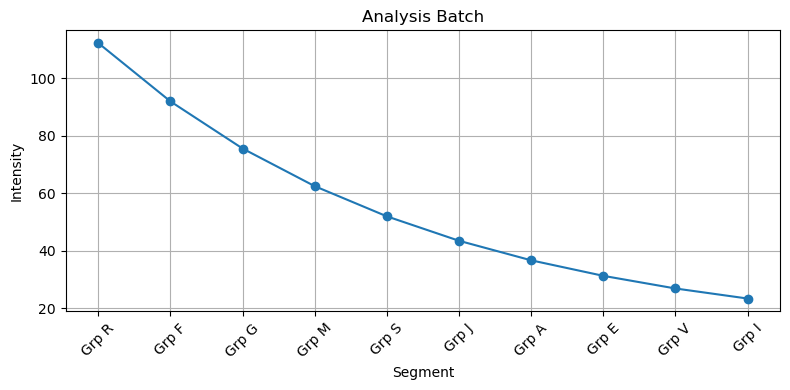

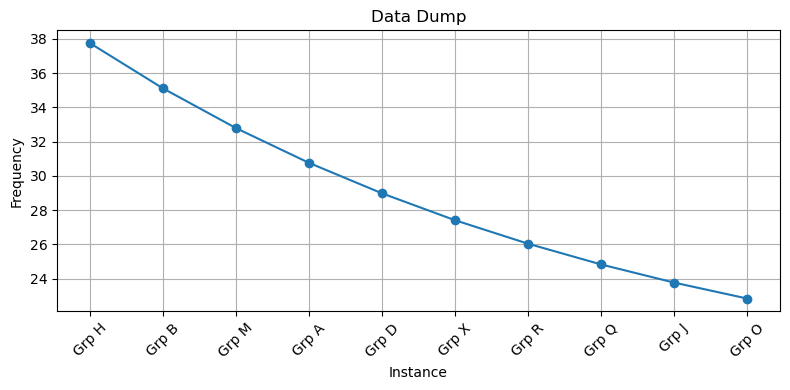

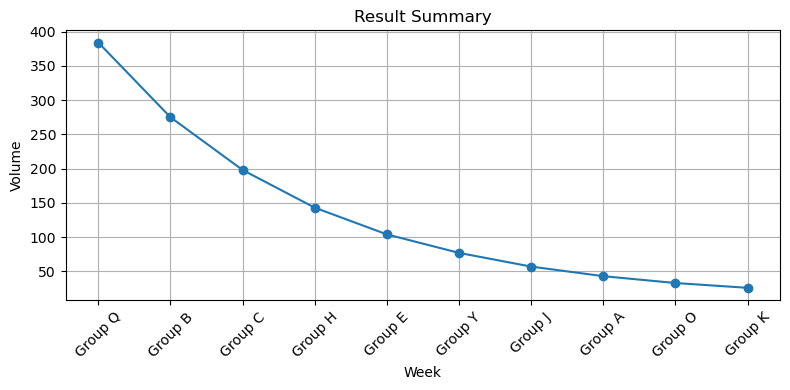

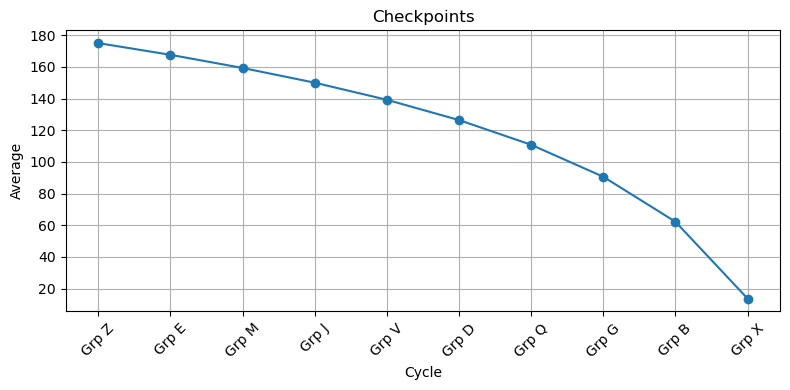

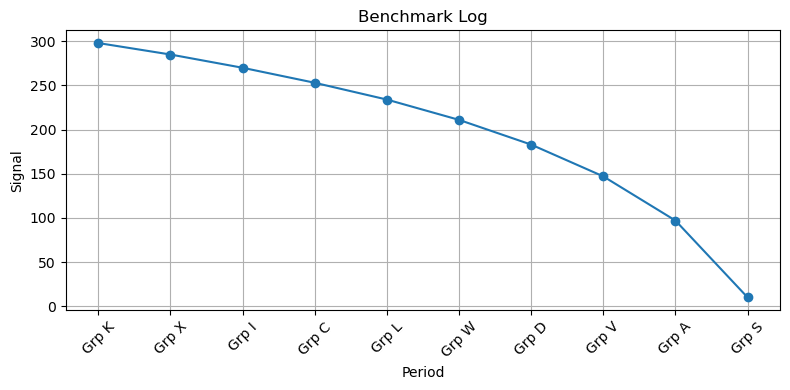

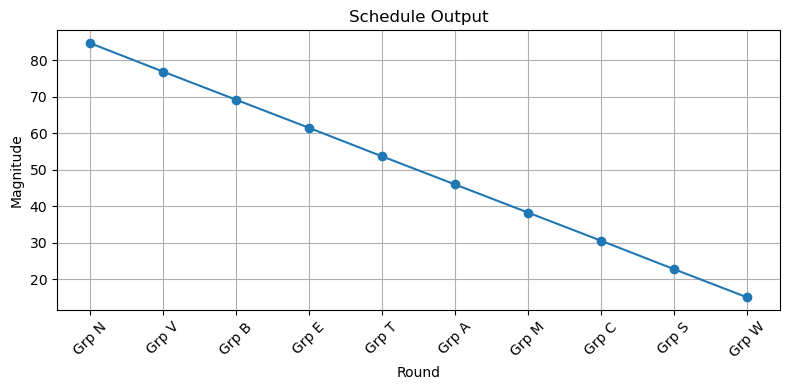

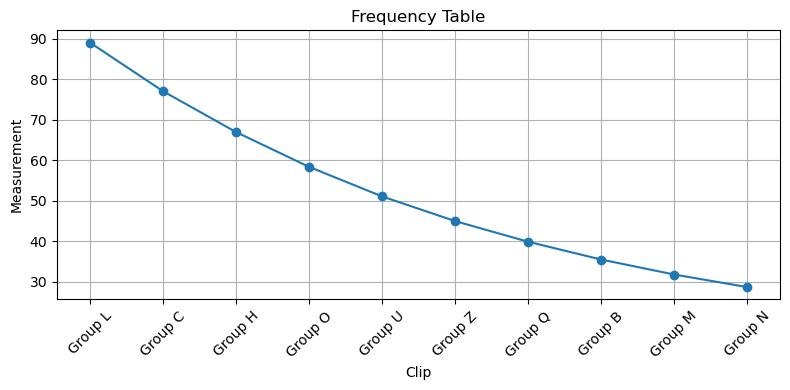

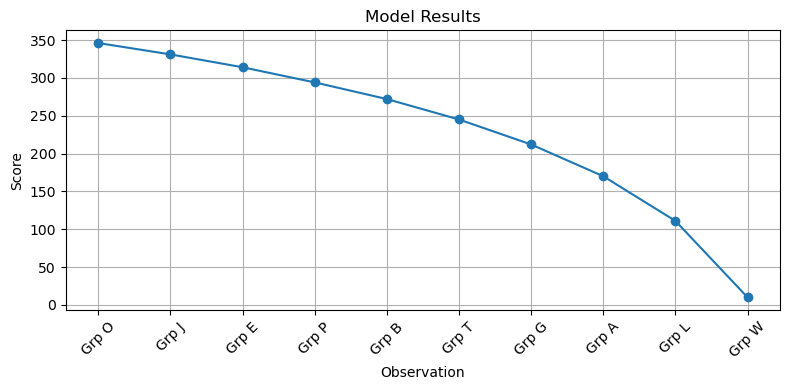

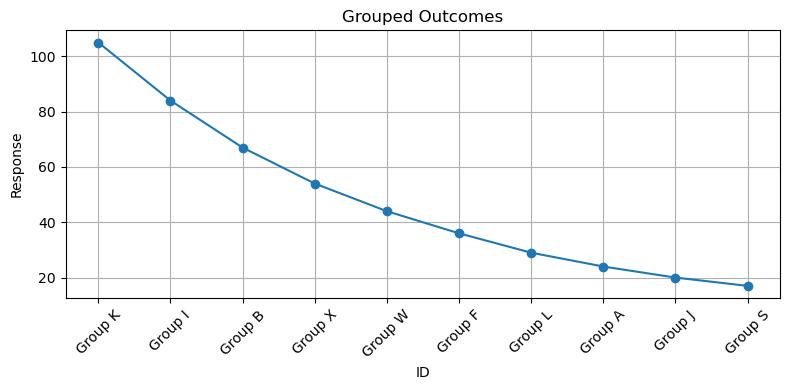

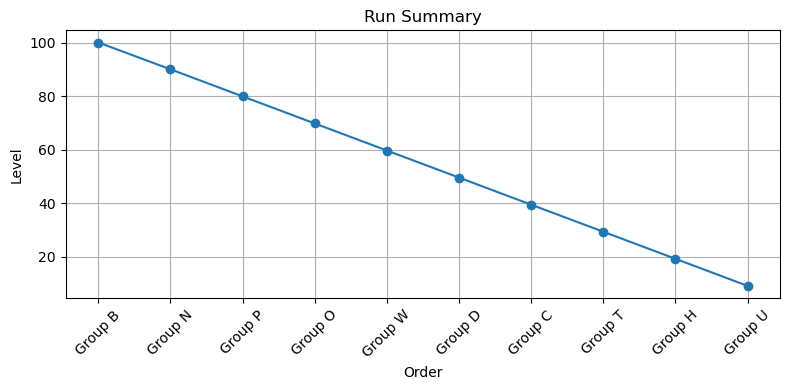

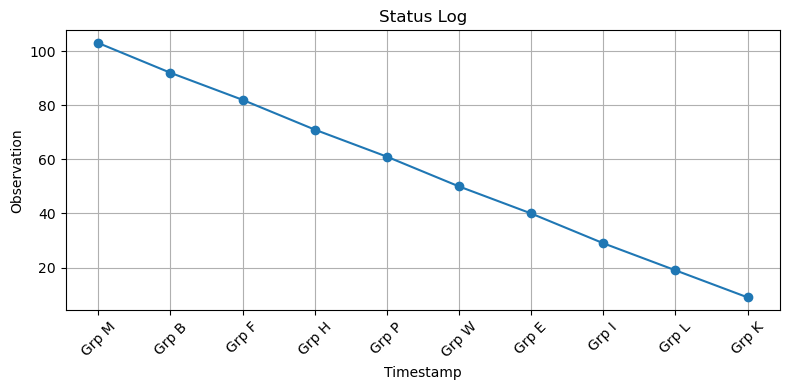

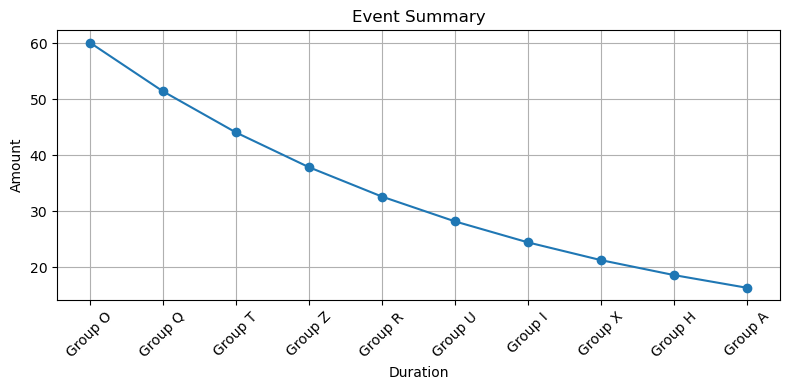

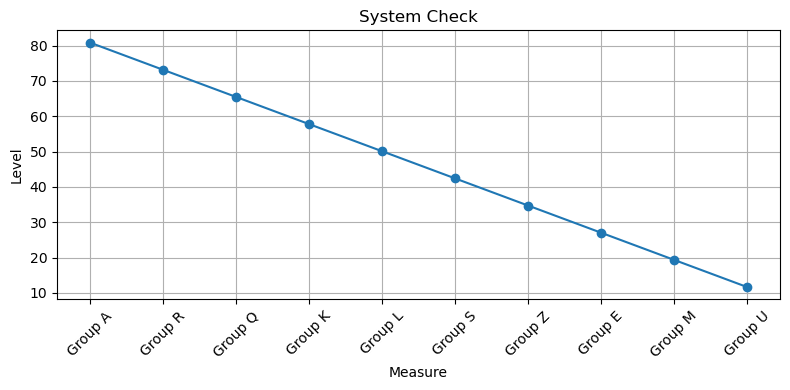

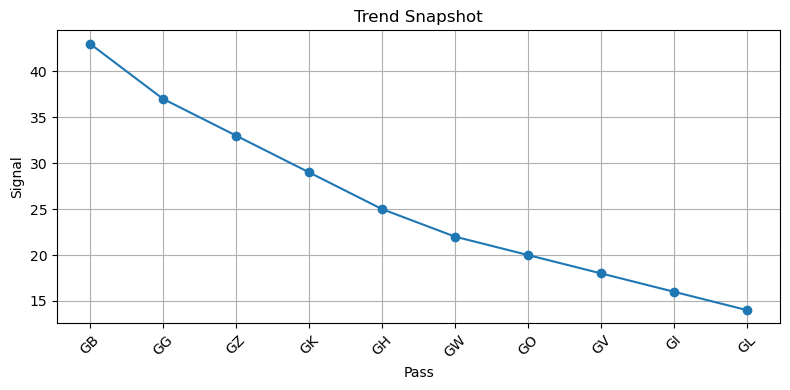

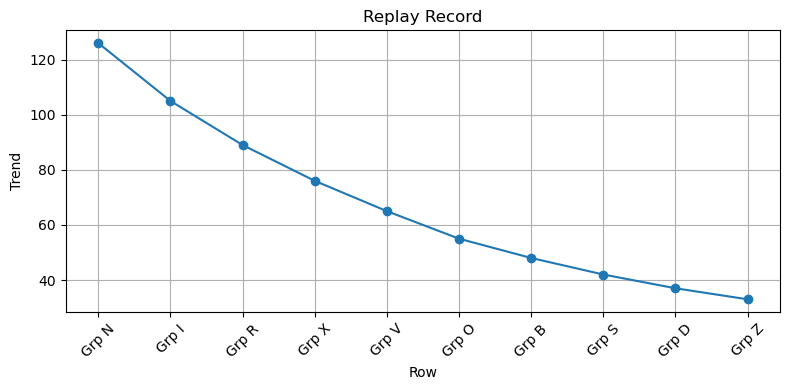

In [ ]:
plotted_table = []
for index, row in dataset.iterrows():
    if row['table_id'] not in plotted_table:
        if row['x_type'] == 'number':
            plot_table(dataset, row['table_id'])
            plotted_table.append(row['table_id'])

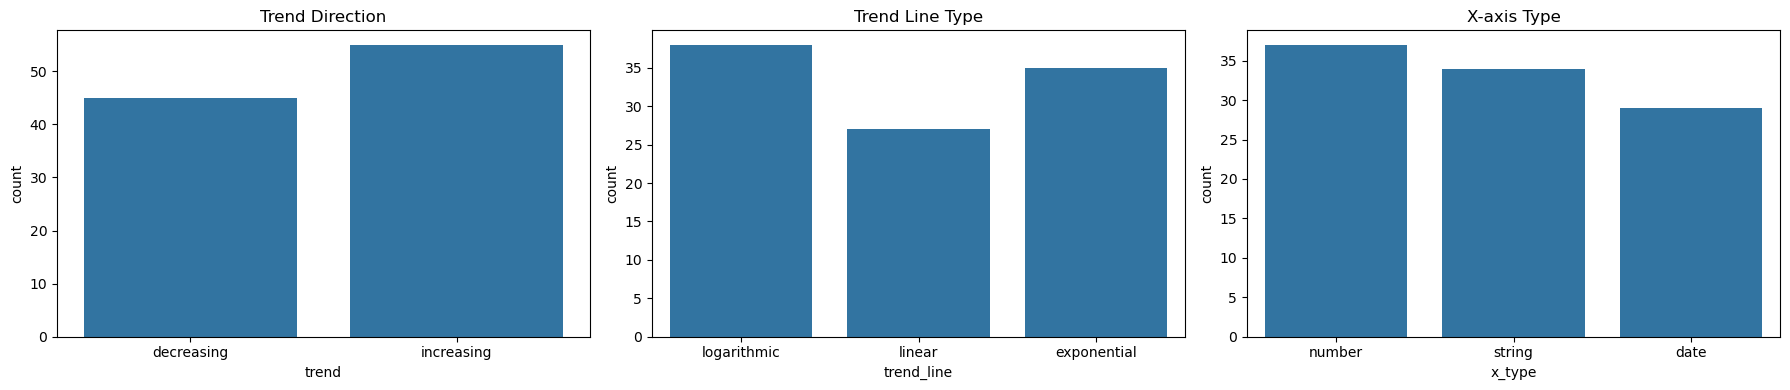

In [6]:
def plot_distribution(df):
    # Use one row per data table
    df_unique = df.drop_duplicates(subset='table_id')

    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    sns.countplot(data=df_unique, x='trend', ax=axs[0])
    sns.countplot(data=df_unique, x='trend_line', ax=axs[1])
    sns.countplot(data=df_unique, x='x_type', ax=axs[2])

    axs[0].set_title("Trend Direction")
    axs[1].set_title("Trend Line Type")
    axs[2].set_title("X-axis Type")

    plt.tight_layout()
    plt.show()

plot_distribution(dataset)

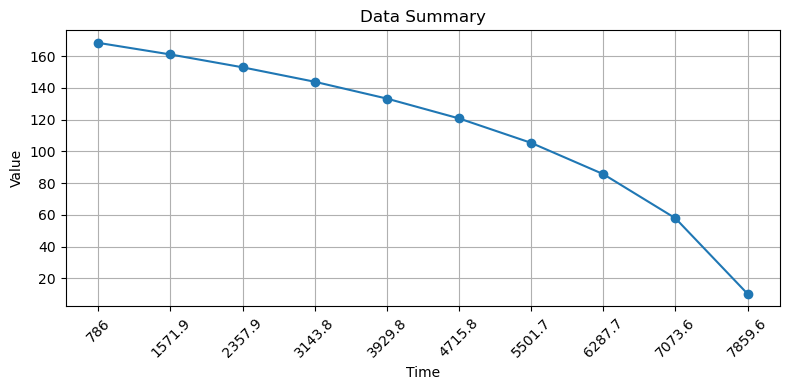

In [7]:
# Function: Plot one data table
def plot_table(df, table_id):
    df_table = df[df['table_id'] == table_id]
    x_vals = df_table['x']

    y_vals = pd.to_numeric(df_table['y'])
    
    # Format x if it's a date
    if df_table['x_type'].iloc[0] == 'date':
        x_vals = pd.to_datetime(x_vals)

    plt.figure(figsize=(8, 4))
    plt.plot(x_vals, y_vals, marker='o')
    plt.title(df_table['title'].iloc[0])
    plt.xlabel(df_table['x_label'].iloc[0])
    plt.ylabel(df_table['y_label'].iloc[0])
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_table(dataset, 0)

→ Plotting table_id 5 (logarithmic)


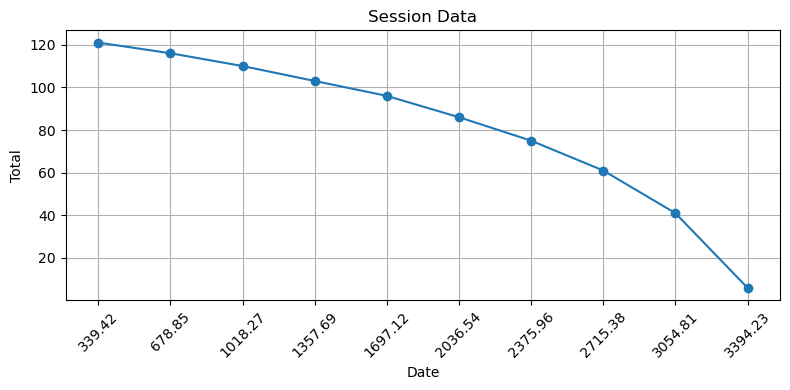

→ Plotting table_id 77 (logarithmic)


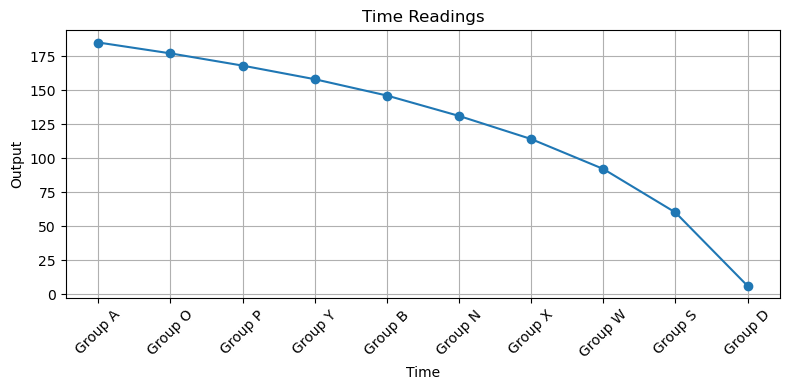

→ Plotting table_id 54 (linear)


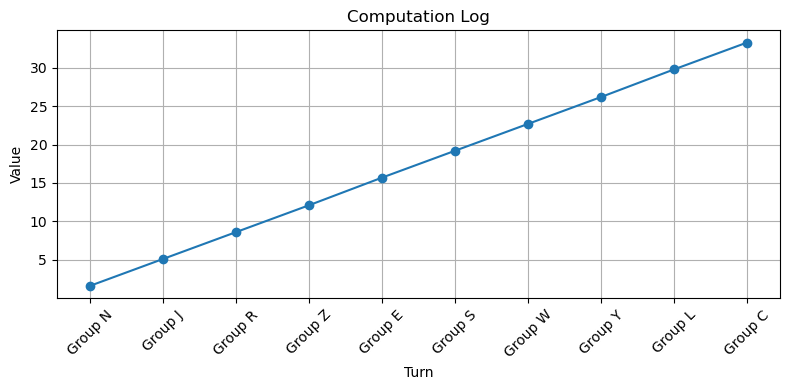

→ Plotting table_id 48 (linear)


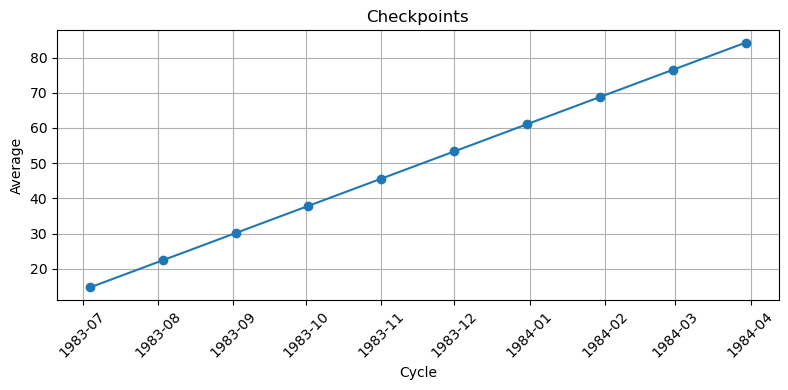

→ Plotting table_id 40 (exponential)


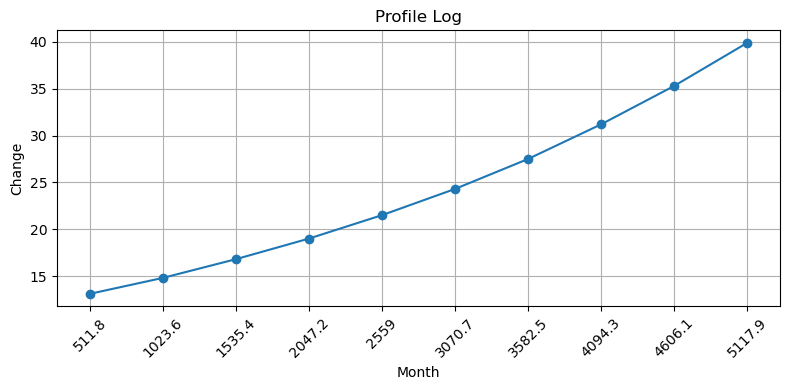

→ Plotting table_id 55 (exponential)


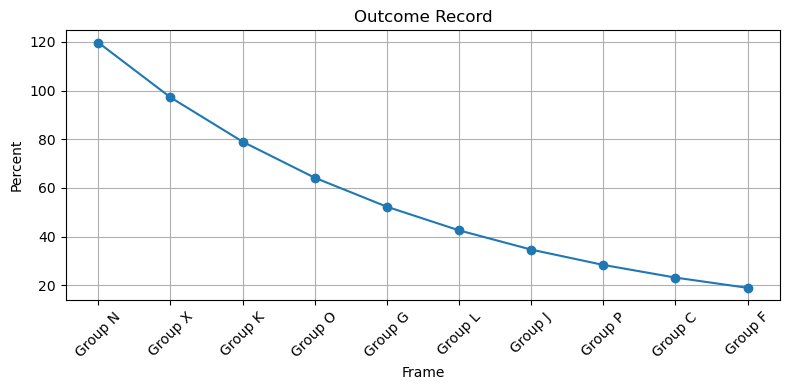

In [8]:
# Function: Plot a few random samples for each trend_line
def plot_examples_by_trend_line(df, n=2):
    for trend_line in df['trend_line'].unique():
        subset = df[df['trend_line'] == trend_line]
        sample_ids = subset['table_id'].drop_duplicates().sample(n, random_state=1)
        for tid in sample_ids:
            print(f"→ Plotting table_id {tid} ({trend_line})")
            plot_table(df, tid)

plot_examples_by_trend_line(dataset)

In [9]:
# Function: Summary stats of value ranges
def summarize_ranges(df):
    summary = df.groupby('table_id').agg({
        'x': ['min', 'max'],
        'y': ['min', 'max']
    })
    print("\nX/Y Value Ranges per Table:")
    print(summary.head(50))
summarize_ranges(dataset)


X/Y Value Ranges per Table:
                   x                  y        
                 min         max    min     max
table_id                                       
0             1571.9         786  10.30  168.40
1              Grp C       Grp Z   2.83   90.36
2         1991-06-11  1992-03-07  12.80   78.70
3               1445      7225.1  24.76   33.55
4            Group C     Group W  29.00   61.00
5            1018.27      678.85   6.00  121.00
6         1968-02-28  1968-11-24  23.00   50.00
7                  0          99  13.00  148.00
8              Grp G       Grp Y  10.81  165.49
9               1026         684  13.00  129.00
10                 0          96   7.00   99.00
11                 0          67  13.00  264.00
12                GA          GZ   2.00   87.00
13                GB          GZ  12.10   29.40
14        1992-09-25  1993-06-22   9.40  269.70
15              1068        5342  17.63   44.23
16              1027      5135.1   8.30  247.40
17         

In [4]:
df = pd.read_csv("debiased_dataset.csv", parse_dates=["x"], dayfirst=True, infer_datetime_format=True)

dataframes = {}
metadata = {}
formatted_strings = {}
for table_id, table in df.groupby("table_id"):
    title = table["title"].iloc[0]
    x_col = table["x_label"].iloc[0]
    y_col = table["y_label"].iloc[0]

    df_xy = table[["x", "y"]].reset_index(drop=True)
    df_xy.columns = [x_col, y_col]
    dataframes[table_id] = df_xy

    row_max = df_xy.loc[df_xy[y_col].idxmax()]
    row_min = df_xy.loc[df_xy[y_col].idxmin()]

    metadata[table_id] = {'trend_line': table["trend_line"].iloc[0], 
                          'trend': table["trend"].iloc[0],
                          'x_type': table["x_type"].iloc[0],
                          'max': float(row_max[y_col]),
                          'max_pos': row_max[x_col], 
                          'max_row': df_xy[y_col].idxmax(),
                          'min': float(row_min[y_col]),
                          'min_pos': row_min[x_col],
                          'min_row': df_xy[y_col].idxmin()}

    values = []
    for _, row in table.iterrows():
        x_val = row["x"]
        # Format dates
        if pd.api.types.is_datetime64_any_dtype(type(x_val)):
            x_val = pd.to_datetime(x_val).strftime('%Y-%m-%d')
        y_val = row["y"]
        y_str = f"{int(y_val)}" if float(y_val).is_integer() else f"{y_val}"
        values.append(f"{x_val} {y_str}")   

    table_str = f"{title} <s> {x_col} {y_col} " + " ".join(values)
    formatted_strings[table_id] = table_str

formatted_strings
# dataframes
# metadata
# # Optional: save the strings to a file
# with open("formatted_table_strings.txt", "w") as f:
#     for s in formatted_strings:
#         f.write(s + "\n")


/var/folders/0_/jn2j6lc10q30z523m2phyv640000gn/T/ipykernel_17900/614212609.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("debiased_dataset.csv", parse_dates=["x"], dayfirst=True, infer_datetime_format=True)
/var/folders/0_/jn2j6lc10q30z523m2phyv640000gn/T/ipykernel_17900/614212609.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("debiased_dataset.csv", parse_dates=["x"], dayfirst=True, infer_datetime_format=True)


{0: 'Data Summary <s> Time Value 786 168.4 1571.9 161.1 2357.9 153 3143.8 143.9 3929.8 133.3 4715.8 120.8 5501.7 105.4 6287.7 85.7 7073.6 57.9 7859.6 10.3',
 1: 'Trend Overview <s> Step Score Grp Z 2.83 Grp I 29.17 Grp R 44.58 Grp W 55.52 Grp T 64 Grp E 70.93 Grp J 76.8 Grp D 81.87 Grp C 86.35 Grp K 90.36',
 2: 'Analysis Results <s> Index Response 1991-06-11 78.7 1991-07-11 71.3 1991-08-10 64 1991-09-09 56.7 1991-10-09 49.4 1991-11-08 42.1 1991-12-08 34.8 1992-01-07 27.4 1992-02-06 20.1 1992-03-07 12.8',
 3: 'Experiment Log <s> Cycle Measurement 722.5 33.55 1445 32.34 2167.5 31.2 2890 30.12 3612.5 29.1 4335 28.14 5057.6 27.22 5780.1 26.36 6502.6 25.54 7225.1 24.76',
 4: 'Daily Report <s> Sample Observation Group K 29 Group W 31 Group C 33 Group G 35 Group S 38 Group H 42 Group U 45 Group E 50 Group R 55 Group O 61',
 5: 'Session Data <s> Date Total 339.42 121 678.85 116 1018.27 110 1357.69 103 1697.12 96 2036.54 86 2375.96 75 2715.38 61 3054.81 41 3394.23 6',
 6: 'Group Comparison <s> 